### Import

In [19]:
import os
import numpy as np
import sys
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from scipy.spatial.distance import cdist
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
from sklearn.cluster import KMeans
from tqdm import tqdm
from sklearn.metrics import silhouette_samples, silhouette_score

### Fonts

In [20]:
csfont = {'fontname':'Georgia'}
hfont = {'fontname':'Helvetica'}

### Create Edge Case Data Sets

In [21]:
#Good Data
np.random.seed(2650)
resolution = 9
k = 4
n_features = 2
n_samples = 800
noise = 1.5
Xgood,y = make_blobs(n_samples=n_samples, n_features=n_features, centers=k, cluster_std=noise)
Xgood[:,0] = Xgood[:,0] - np.mean(Xgood[:,0])
Xgood[:,1] = Xgood[:,1] - np.mean(Xgood[:,1])


#Very Noise Data Data
np.random.seed(2650)
resolution = 9
k = 4
n_features = 2
n_samples = 800
noise = 4
Xnoisy,y = make_blobs(n_samples=n_samples, n_features=n_features, centers=k, cluster_std=noise)
Xnoisy[:,0] = Xnoisy[:,0] - np.mean(Xnoisy[:,0])
Xnoisy[:,1] = Xnoisy[:,1] - np.mean(Xnoisy[:,1])

### Use Scikit Learns K-Means

In [22]:
kmeans_good = KMeans(n_clusters=k, random_state=0).fit(Xgood)
y_pred_good = kmeans_good.labels_
kmeans_noisy = KMeans(n_clusters=k, random_state=0).fit(Xnoisy)
y_pred_noisy = kmeans_noisy.labels_
kmeans_toomany = KMeans(n_clusters=k+2, random_state=0).fit(Xgood)
y_pred_toomany = kmeans_toomany.labels_
kmeans_toofew = KMeans(n_clusters=k-1, random_state=0).fit(Xgood)
y_pred_toofew = kmeans_toofew.labels_

### Silhouette Plot and Metric - Good Data

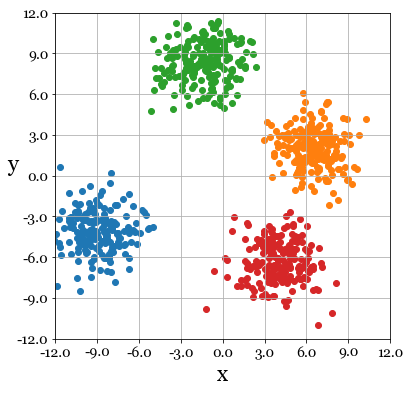

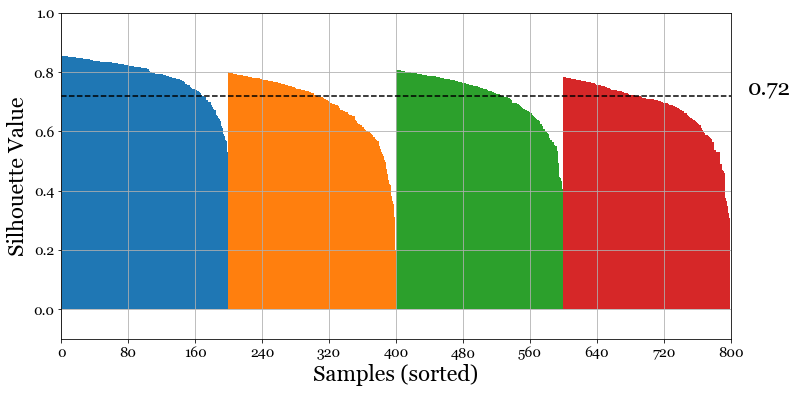

In [23]:
plt.figure(figsize=(6,6))
for idx in range(k):
    indices = np.where(y_pred_good==idx)[0]
    plt.scatter(Xgood[indices,0],Xgood[indices,1])
plt.xlabel('x',fontsize=22,**csfont);
plt.ylabel('y',fontsize=22,**csfont,rotation=0);
plt.yticks(np.linspace(-12,12,resolution),labels=np.linspace(-12,12,resolution),fontsize=14,**csfont);
plt.xticks(np.linspace(-12,12,resolution),labels=np.linspace(-12,12,resolution),fontsize=14,**csfont);
plt.grid();
plt.axis((-12,12,-12,12));
plt.savefig('../../assets/figures/017/kmeans-silhouette-good-data.png',dpi=300,bbox_inches="tight")

silhouette_avg = silhouette_score(Xgood, y_pred_good)
sample_silhouette_values = silhouette_samples(Xgood, y_pred_good)
silhouette_values = []
sorted_labels = []
for i in range(k):
    ith_cluster_silhouette_values = sample_silhouette_values[y_pred_good == i]
    ith_cluster_silhouette_values.sort()
    ith_cluster_silhouette_values = ith_cluster_silhouette_values[::-1]
    silhouette_values = silhouette_values + ith_cluster_silhouette_values.tolist()
    sorted_labels = sorted_labels + (np.zeros((len(ith_cluster_silhouette_values)))+i).astype(int).tolist()
silhouette_values = np.array(silhouette_values)
sorted_labels = np.array(sorted_labels)
plt.figure(figsize=(12,6))
for i in range(k):
    idx = np.where(sorted_labels == i)[0]
    plt.bar(idx,silhouette_values[idx],1)
plt.ylabel('Silhouette Value',fontsize=22,**csfont);
plt.xlabel('Samples (sorted)',fontsize=22,**csfont,rotation=0);
plt.plot([0,len(y_pred_good)],[silhouette_avg,silhouette_avg],'k--')
plt.text(len(y_pred_good)+20,silhouette_avg,str(np.round(silhouette_avg,2)),fontsize=22,**csfont);
plt.yticks(np.linspace(-1,1,11),labels=np.round(np.linspace(-1,1,11),2),fontsize=14,**csfont);
plt.xticks(np.linspace(0,len(silhouette_values),11),
           labels=np.linspace(0,len(silhouette_values),11).astype(int),fontsize=14,**csfont);
plt.grid()
plt.axis((0,len(y_pred_good),-0.1,1))
plt.savefig('../../assets/figures/017/means-silhouette-good-data-silhouette.png',dpi=300,bbox_inches="tight") 

### Noisy Data

0.4007116996315204


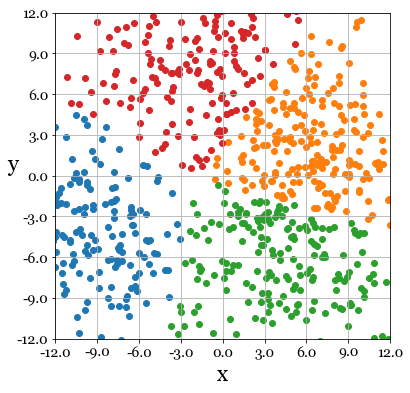

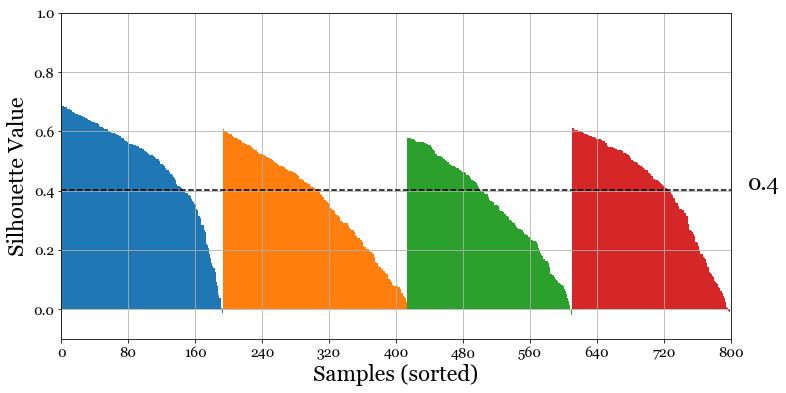

In [24]:
plt.figure(figsize=(6,6))
for idx in range(k):
    indices = np.where(y_pred_noisy==idx)[0]
    plt.scatter(Xnoisy[indices,0],Xnoisy[indices,1])
plt.xlabel('x',fontsize=22,**csfont);
plt.ylabel('y',fontsize=22,**csfont,rotation=0);
plt.yticks(np.linspace(-12,12,resolution),labels=np.linspace(-12,12,resolution),fontsize=14,**csfont);
plt.xticks(np.linspace(-12,12,resolution),labels=np.linspace(-12,12,resolution),fontsize=14,**csfont);
plt.grid();
plt.axis((-12,12,-12,12));
plt.savefig('../../assets/figures/017/kmeans-silhouette-noisy-data.png',dpi=300,bbox_inches="tight")

silhouette_avg = silhouette_score(Xnoisy, y_pred_noisy)
print(silhouette_avg)
sample_silhouette_values = silhouette_samples(Xnoisy, y_pred_noisy)
silhouette_values = []
sorted_labels = []
for i in range(k):
    ith_cluster_silhouette_values = sample_silhouette_values[y_pred_noisy == i]
    ith_cluster_silhouette_values.sort()
    ith_cluster_silhouette_values = ith_cluster_silhouette_values[::-1]
    silhouette_values = silhouette_values + ith_cluster_silhouette_values.tolist()
    sorted_labels = sorted_labels + (np.zeros((len(ith_cluster_silhouette_values)))+i).astype(int).tolist()
silhouette_values = np.array(silhouette_values)
sorted_labels = np.array(sorted_labels)
plt.figure(figsize=(12,6))
for i in range(k):
    idx = np.where(sorted_labels == i)[0]
    plt.bar(idx,silhouette_values[idx],1)
plt.ylabel('Silhouette Value',fontsize=22,**csfont);
plt.xlabel('Samples (sorted)',fontsize=22,**csfont,rotation=0);
plt.plot([0,len(y_pred_noisy)],[silhouette_avg,silhouette_avg],'k--')
plt.text(len(y_pred_noisy)+20,silhouette_avg,str(np.round(silhouette_avg,2)),fontsize=22,**csfont);
plt.yticks(np.linspace(-1,1,11),labels=np.round(np.linspace(-1,1,11),2),fontsize=14,**csfont);
plt.xticks(np.linspace(0,len(silhouette_values),11),
           labels=np.linspace(0,len(silhouette_values),11).astype(int),fontsize=14,**csfont);
plt.grid()
plt.axis((0,len(y_pred_noisy),-0.1,1))
plt.savefig('../../assets/figures/017/means-silhouette-noisy-data-silhouette.png',dpi=300,bbox_inches="tight") 

### Fitting too many clusters

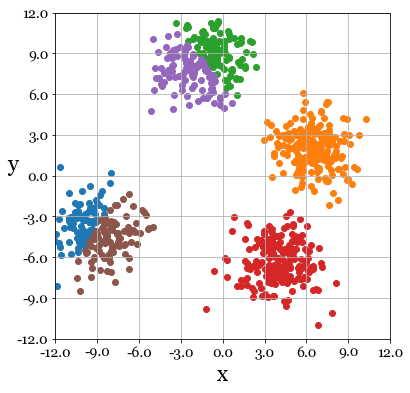

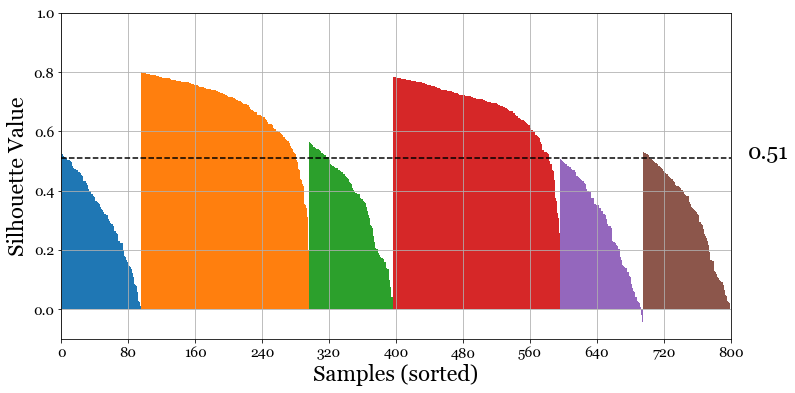

In [25]:
plt.figure(figsize=(6,6))

for idx in range(k+2):
    indices = np.where(y_pred_toomany==idx)[0]
    plt.scatter(Xgood[indices,0],Xgood[indices,1])
plt.xlabel('x',fontsize=22,**csfont);
plt.ylabel('y',fontsize=22,**csfont,rotation=0);
plt.yticks(np.linspace(-12,12,resolution),labels=np.linspace(-12,12,resolution),fontsize=14,**csfont);
plt.xticks(np.linspace(-12,12,resolution),labels=np.linspace(-12,12,resolution),fontsize=14,**csfont);
plt.grid();
plt.axis((-12,12,-12,12));
plt.savefig('../../assets/figures/017/kmeans-silhouette-toomany-data.png',dpi=300,bbox_inches="tight")

silhouette_avg = silhouette_score(Xgood, y_pred_toomany)
sample_silhouette_values = silhouette_samples(Xgood, y_pred_toomany)
silhouette_values = []
sorted_labels = []
for i in range(k+2):
    ith_cluster_silhouette_values = sample_silhouette_values[y_pred_toomany == i]
    ith_cluster_silhouette_values.sort()
    ith_cluster_silhouette_values = ith_cluster_silhouette_values[::-1]
    silhouette_values = silhouette_values + ith_cluster_silhouette_values.tolist()
    sorted_labels = sorted_labels + (np.zeros((len(ith_cluster_silhouette_values)))+i).astype(int).tolist()
silhouette_values = np.array(silhouette_values)
sorted_labels = np.array(sorted_labels)
plt.figure(figsize=(12,6))
for i in range(k+2):
    idx = np.where(sorted_labels == i)[0]
    plt.bar(idx,silhouette_values[idx],1)
plt.ylabel('Silhouette Value',fontsize=22,**csfont);
plt.xlabel('Samples (sorted)',fontsize=22,**csfont,rotation=0);
plt.plot([0,len(y_pred_toomany)],[silhouette_avg,silhouette_avg],'k--')
plt.text(len(y_pred_toomany)+20,silhouette_avg,str(np.round(silhouette_avg,2)),fontsize=22,**csfont);
plt.yticks(np.linspace(-1,1,11),labels=np.round(np.linspace(-1,1,11),2),fontsize=14,**csfont);
plt.xticks(np.linspace(0,len(silhouette_values),11),
           labels=np.linspace(0,len(silhouette_values),11).astype(int),fontsize=14,**csfont);
plt.grid()
plt.axis((0,len(y_pred_toomany),-0.1,1))
plt.savefig('../../assets/figures/017/means-silhouette-too-many-clusters-silhouette.png',dpi=300,bbox_inches="tight") 

### Fitting too few clusters

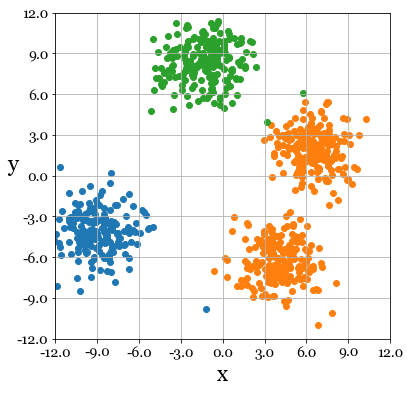

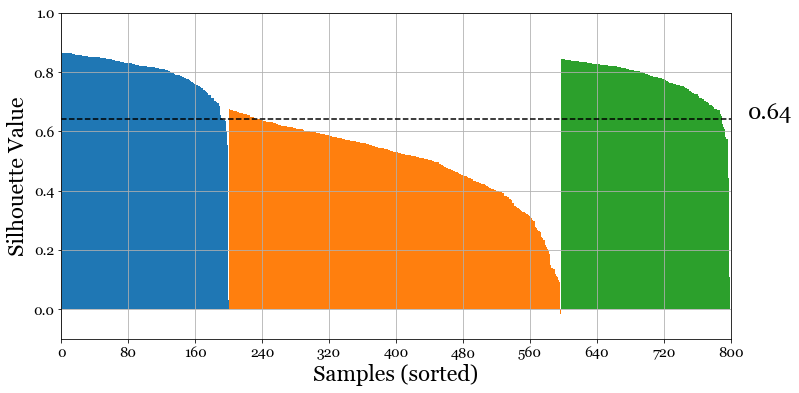

In [26]:
plt.figure(figsize=(6,6))
for idx in range(k-1):
    indices = np.where(y_pred_toofew==idx)[0]
    plt.scatter(Xgood[indices,0],Xgood[indices,1])
plt.xlabel('x',fontsize=22,**csfont);
plt.ylabel('y',fontsize=22,**csfont,rotation=0);
plt.yticks(np.linspace(-12,12,resolution),labels=np.linspace(-12,12,resolution),fontsize=14,**csfont);
plt.xticks(np.linspace(-12,12,resolution),labels=np.linspace(-12,12,resolution),fontsize=14,**csfont);
plt.grid();
plt.axis((-12,12,-12,12));
plt.savefig('../../assets/figures/017/kmeans-silhouette-toofew.png',dpi=300,bbox_inches="tight")

silhouette_avg = silhouette_score(Xgood, y_pred_toofew)
sample_silhouette_values = silhouette_samples(Xgood, y_pred_toofew)
silhouette_values = []
sorted_labels = []
for i in range(k-1):
    ith_cluster_silhouette_values = sample_silhouette_values[y_pred_toofew == i]
    ith_cluster_silhouette_values.sort()
    ith_cluster_silhouette_values = ith_cluster_silhouette_values[::-1]
    silhouette_values = silhouette_values + ith_cluster_silhouette_values.tolist()
    sorted_labels = sorted_labels + (np.zeros((len(ith_cluster_silhouette_values)))+i).astype(int).tolist()
silhouette_values = np.array(silhouette_values)
sorted_labels = np.array(sorted_labels)
plt.figure(figsize=(12,6))
for i in range(k-1):
    idx = np.where(sorted_labels == i)[0]
    plt.bar(idx,silhouette_values[idx],1)
plt.ylabel('Silhouette Value',fontsize=22,**csfont);
plt.xlabel('Samples (sorted)',fontsize=22,**csfont,rotation=0);
plt.plot([0,len(y_pred_toofew)],[silhouette_avg,silhouette_avg],'k--')
plt.text(len(y_pred_toofew)+20,silhouette_avg,str(np.round(silhouette_avg,2)),fontsize=22,**csfont);
plt.yticks(np.linspace(-1,1,11),labels=np.round(np.linspace(-1,1,11),2),fontsize=14,**csfont);
plt.xticks(np.linspace(0,len(silhouette_values),11),
           labels=np.linspace(0,len(silhouette_values),11).astype(int),fontsize=14,**csfont);
plt.grid()
plt.axis((0,len(y_pred_toofew),-0.1,1))
plt.savefig('../../assets/figures/017/means-silhouette-too-few-clusters-silhouette.png',dpi=300,bbox_inches="tight") 